# Data Exploration

This notebook performs exploratory data analysis (EDA) on the preprocessed Tour de France dataset. It focuses on understanding distributions, identifying missing values, and inspecting correlations between features.

## Key Steps:
- Loads the cleaned dataset from "Data/Processed/"
- Examines dataset structure and missing values
- Explores feature distributions with histograms
- Investigates pairwise correlations to inform feature engineering

## Import Libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import sys
from pathlib import Path

sns.set(style="whitegrid")

## Set Folder Path and Read CSVs

In [2]:
def find_project_root(start: Path, anchor_dirs=("src", "Data")) -> Path:
    """
    Walk up the directory tree until we find a folder that
    contains all anchor_dirs (e.g. 'src' and 'Data').
    """
    path = start.resolve()
    for parent in [path] + list(path.parents):
        if all((parent / d).is_dir() for d in anchor_dirs):
            return parent
    raise FileNotFoundError("Could not locate project root")

In [3]:
# Locate the project root regardless of notebook depth
project_root = find_project_root(Path.cwd())

# ----- Code modules --------------------------------------------------
src_path = project_root / "src"
if str(src_path) not in sys.path:
    sys.path.append(str(src_path))

from data_prep import preprocess_tdf_data   # import data preproc function

# ----- Data ----------------------------------------------------------
data_raw_path = project_root / "Data" / "Raw"
print("Raw data folder:", data_raw_path)

Raw data folder: C:\Users\Shaun Ricketts\Documents\Projects\Cycling\Tour de France Predictor - 2025\Data\Raw


In [4]:
# Import function
from data_prep import preprocess_tdf_data

In [5]:
prepared_df = pd.read_csv(data_raw_path / "tdf_prepared_2011_2024.csv",
                         usecols = ['Rider_ID', 'Year', 'Age', 'TDF_Pos', 'Best_Pos_BT_UWT',
       'Best_Pos_BT_PT', 'Best_Pos_AT_UWT_YB', 'Best_Pos_AT_PT_YB',
       'Best_Pos_UWT_YB', 'Best_Pos_PT_YB', 'FC_Points_YB', 'FC_Pos_YB',
       'best_tdf_result', 'best_other_gt_result', 'best_recent_tdf_result',
       'best_recent_other_gt_result', 'tdf_debut', 'gt_debut', 'rode_giro'])

## Basic Info

In [6]:
prepared_df.shape

(21234, 19)

In [7]:
prepared_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21234 entries, 0 to 21233
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rider_ID                     21234 non-null  int64  
 1   Year                         21234 non-null  int64  
 2   TDF_Pos                      2626 non-null   object 
 3   Best_Pos_BT_UWT              9149 non-null   object 
 4   Best_Pos_BT_PT               14459 non-null  object 
 5   Best_Pos_AT_UWT_YB           5470 non-null   object 
 6   Best_Pos_AT_PT_YB            7513 non-null   object 
 7   Best_Pos_UWT_YB              8435 non-null   object 
 8   Best_Pos_PT_YB               12580 non-null  object 
 9   FC_Points_YB                 21234 non-null  float64
 10  FC_Pos_YB                    21234 non-null  int64  
 11  best_tdf_result              1973 non-null   float64
 12  best_other_gt_result         2215 non-null   float64
 13  best_recent_tdf_

In [8]:
prepared_df.head()

,Rider_ID,Year,TDF_Pos,Best_Pos_BT_UWT,Best_Pos_BT_PT,Best_Pos_AT_UWT_YB,Best_Pos_AT_PT_YB,Best_Pos_UWT_YB,Best_Pos_PT_YB,FC_Points_YB,FC_Pos_YB,best_tdf_result,best_other_gt_result,best_recent_tdf_result,best_recent_other_gt_result,tdf_debut,gt_debut,rode_giro,Age
0,2,2011,NaN,67.0,NaN,NaN,NaN,NaN,NaN,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40
1,3,2011,5.0,1.0,NaN,NaN,NaN,NaN,NaN,0.0,1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,29
2,3,2012,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2685.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30
3,3,2013,4.0,3.0,2.0,1.0,NaN,1.0,NaN,1719.0,12,1.0,1.0,5.0,1.0,0.0,0.0,0.0,31
4,3,2014,DNF,1.0,NaN,NaN,NaN,3.0,2.0,1622.0,13,1.0,1.0,4.0,1.0,0.0,0.0,0.0,32


Random sample of the data for rider's who have ridden the Tour de France in the period of 2011-2024

In [9]:
prepared_df[prepared_df["TDF_Pos"].notnull()].sample(n=10)

,Rider_ID,Year,TDF_Pos,Best_Pos_BT_UWT,Best_Pos_BT_PT,Best_Pos_AT_UWT_YB,Best_Pos_AT_PT_YB,Best_Pos_UWT_YB,Best_Pos_PT_YB,FC_Points_YB,FC_Pos_YB,best_tdf_result,best_other_gt_result,best_recent_tdf_result,best_recent_other_gt_result,tdf_debut,gt_debut,rode_giro,Age
3262,868,2020,DNF,9.0,10.0,10.0,NaN,8.0,36.0,676.0,106,12.0,8.0,14.0,10.0,0.0,0.0,0.0,36
4761,1966,2015,145.0,86.0,56.0,78.0,78.0,57.0,38.0,812.0,69,NaN,107.0,NaN,107.0,1.0,0.0,0.0,26
12964,17203,2020,53.0,40.0,5.0,NaN,5.0,45.0,5.0,457.0,171,NaN,NaN,NaN,NaN,1.0,1.0,0.0,28
4936,2145,2014,66.0,30.0,NaN,37.0,DNF,31.0,DNF,124.0,367,NaN,44.0,NaN,72.0,1.0,0.0,1.0,30
815,153,2012,DNF,35.0,DNF,NaN,NaN,DNF,NaN,0.0,494,45.0,30.0,45.0,50.0,0.0,0.0,0.0,29
5396,2324,2016,DNF,5.0,4.0,6.0,NaN,3.0,NaN,1613.0,15,33.0,6.0,33.0,6.0,0.0,0.0,1.0,26
5469,2337,2017,DNF,123.0,60.0,20.0,44.0,20.0,44.0,1303.0,32,138.0,NaN,138.0,NaN,0.0,0.0,0.0,26
4389,1709,2011,157.0,124.0,22.0,NaN,NaN,NaN,NaN,0.0,1,NaN,NaN,NaN,NaN,1.0,1.0,0.0,23
785,149,2011,7.0,2.0,NaN,NaN,NaN,NaN,NaN,0.0,1,11.0,1.0,29.0,11.0,0.0,0.0,0.0,30
7261,5306,2019,116.0,71.0,NaN,31.0,NaN,31.0,NaN,266.0,253,67.0,87.0,67.0,87.0,0.0,0.0,0.0,28


In [10]:
(prepared_df == "DNF").sum()

Rider_ID                          0
Year                              0
TDF_Pos                         459
Best_Pos_BT_UWT                1009
Best_Pos_BT_PT                 1981
Best_Pos_AT_UWT_YB              977
Best_Pos_AT_PT_YB               874
Best_Pos_UWT_YB                 678
Best_Pos_PT_YB                 1031
FC_Points_YB                      0
FC_Pos_YB                         0
best_tdf_result                   0
best_other_gt_result              0
best_recent_tdf_result            0
best_recent_other_gt_result       0
tdf_debut                         0
gt_debut                          0
rode_giro                         0
Age                               0
dtype: int64

In [11]:
(prepared_df == "DSQ").sum()

Rider_ID                       0
Year                           0
TDF_Pos                        1
Best_Pos_BT_UWT                0
Best_Pos_BT_PT                 0
Best_Pos_AT_UWT_YB             0
Best_Pos_AT_PT_YB              0
Best_Pos_UWT_YB                0
Best_Pos_PT_YB                 0
FC_Points_YB                   0
FC_Pos_YB                      0
best_tdf_result                0
best_other_gt_result           0
best_recent_tdf_result         0
best_recent_other_gt_result    0
tdf_debut                      0
gt_debut                       0
rode_giro                      0
Age                            0
dtype: int64

In [12]:
(prepared_df == 1000).sum()

Rider_ID                       0
Year                           0
TDF_Pos                        0
Best_Pos_BT_UWT                0
Best_Pos_BT_PT                 0
Best_Pos_AT_UWT_YB             0
Best_Pos_AT_PT_YB              0
Best_Pos_UWT_YB                0
Best_Pos_PT_YB                 0
FC_Points_YB                   2
FC_Pos_YB                      0
best_tdf_result                0
best_other_gt_result           0
best_recent_tdf_result         0
best_recent_other_gt_result    0
tdf_debut                      0
gt_debut                       0
rode_giro                      0
Age                            0
dtype: int64

In [13]:
(prepared_df == 999).sum()

Rider_ID                       0
Year                           0
TDF_Pos                        0
Best_Pos_BT_UWT                0
Best_Pos_BT_PT                 0
Best_Pos_AT_UWT_YB             0
Best_Pos_AT_PT_YB              0
Best_Pos_UWT_YB                0
Best_Pos_PT_YB                 0
FC_Points_YB                   1
FC_Pos_YB                      0
best_tdf_result                0
best_other_gt_result           0
best_recent_tdf_result         0
best_recent_other_gt_result    0
tdf_debut                      0
gt_debut                       0
rode_giro                      0
Age                            0
dtype: int64

In [14]:
prepared_df[
    (prepared_df["best_recent_tdf_result"].isna()) &
    (prepared_df["best_recent_other_gt_result"].isna()) &
    (
        (prepared_df["best_tdf_result"].notnull()) |
        (prepared_df["best_other_gt_result"].notnull())
    ) &
    (prepared_df["TDF_Pos"].notnull())
]

,Rider_ID,Year,TDF_Pos,Best_Pos_BT_UWT,Best_Pos_BT_PT,Best_Pos_AT_UWT_YB,Best_Pos_AT_PT_YB,Best_Pos_UWT_YB,Best_Pos_PT_YB,FC_Points_YB,FC_Pos_YB,best_tdf_result,best_other_gt_result,best_recent_tdf_result,best_recent_other_gt_result,tdf_debut,gt_debut,rode_giro,Age
45,12,2015,DNF,52.0,59.0,DNF,NaN,51.0,31.0,1396.0,29,62.0,NaN,NaN,NaN,0.0,0.0,0.0,34
46,12,2016,DNF,60.0,7.0,DNF,NaN,52.0,59.0,518.0,136,62.0,NaN,NaN,NaN,0.0,0.0,1.0,35
63,14,2021,139.0,NaN,55.0,DNF,102.0,116.0,102.0,48.0,321,130.0,127.0,NaN,NaN,0.0,0.0,0.0,36
138,28,2015,148.0,83.0,2.0,65.0,83.0,46.0,83.0,133.0,376,82.0,11.0,NaN,NaN,0.0,0.0,0.0,36
188,33,2011,DNF,105.0,36.0,NaN,NaN,NaN,NaN,0.0,1,118.0,92.0,NaN,NaN,0.0,0.0,0.0,31
305,55,2012,DNF,20.0,23.0,63.0,31.0,63.0,31.0,49.0,446,9.0,28.0,NaN,NaN,0.0,0.0,0.0,33
535,97,2018,DNF,95.0,22.0,DNF,63.0,117.0,52.0,91.0,403,142.0,144.0,NaN,NaN,0.0,0.0,0.0,36
950,170,2021,DNF,101.0,21.0,48.0,NaN,48.0,56.0,63.0,306,110.0,61.0,NaN,NaN,0.0,0.0,0.0,38
951,170,2022,112.0,DNF,53.0,NaN,NaN,101.0,21.0,75.0,408,110.0,61.0,NaN,NaN,0.0,0.0,0.0,39
1077,194,2014,107.0,60.0,20.0,NaN,92.0,DNF,68.0,62.0,423,116.0,121.0,NaN,NaN,0.0,0.0,0.0,31


Riders who have a ridden a Grand Tour in their lifetime, but not in the past 3 years. 
There are many possible reasons for this happening:
- DNFs are Null, so if they didn't finish any race started in the past 3 years their best result will be Null
- They may be returning from a racing ban (usually 2 years for doping violations)
- Returning from a serious injury
- Returning from a career break

The highest result of any of these is 38th (from a rider who had finished 6th in the past), generally these riders finish in low positions or DNF

In [15]:
# Create new column to filter out DNF and DSQ values from TDF_Pos
prepared_df["TDF_Pos_num"] = pd.to_numeric(prepared_df["TDF_Pos"], errors="coerce")

In [16]:
# Create new df for TDF_Pos != DNF/DSQ/Null
eda_df = prepared_df[prepared_df["TDF_Pos_num"].notna()]

## Missing Values

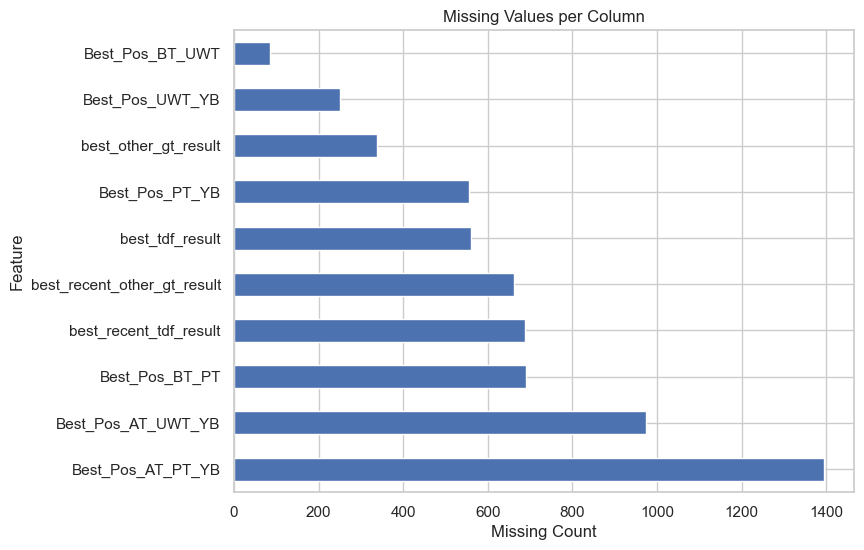

In [17]:
missing = eda_df.isna().sum()
missing[missing > 0].sort_values(ascending=False).plot(kind='barh', figsize=(8,6))
plt.title("Missing Values per Column")
plt.xlabel("Missing Count")
plt.ylabel("Feature")
plt.show()

Most nulls are for race results after the Tour de France (AT) from the year before (YB), which is not that surprising as most of the big races of the year are held before the Tour de France. It's likely many of these riders rode either one or more World-Tour (UWT) or Pro-Tour (PT) races, but not both.
best_recent_...result columns are their best results from the past 3 years, riders who haven't raced for a long time may account for a few, but most of these will be from debutants. You can see best_tdf_result has only slightly less nulls than recent_other, so this lines up. 

## Correlations

In [24]:
# List all columns where DNF occurs (based on your list)
cols_with_dnf = [
    'TDF_Pos', 'Best_Pos_BT_UWT', 'Best_Pos_BT_PT', 'Best_Pos_AT_UWT_YB',
    'Best_Pos_AT_PT_YB', 'Best_Pos_UWT_YB', 'Best_Pos_PT_YB'
]

# Replace 'DNF' and 'DSQ' with NaN and convert to float
for col in cols_with_dnf:
    eda_df.loc[:, col] = eda_df.loc[:, col].replace(['DNF', 'DSQ'], np.nan).astype(float)

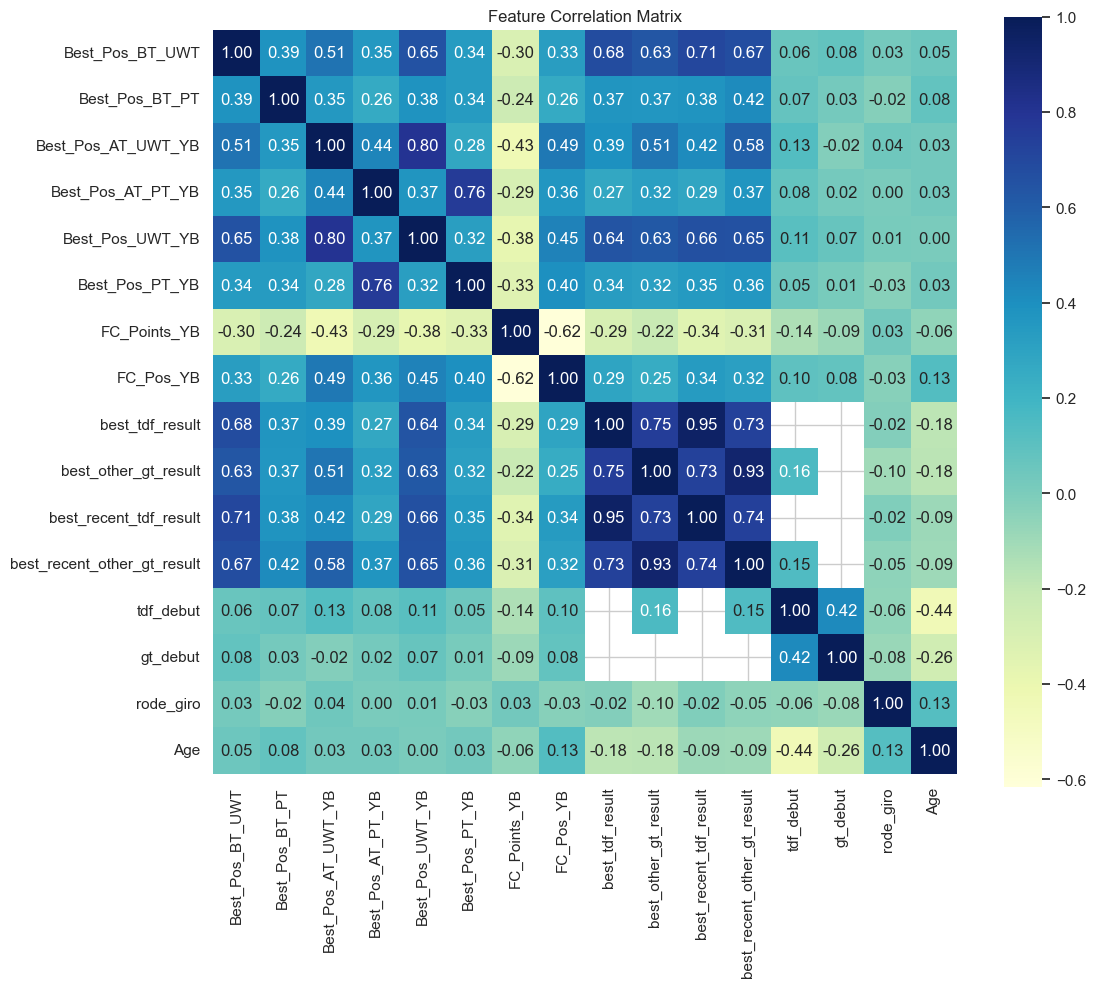

In [27]:
plt.figure(figsize=(12, 10))
corr_matrix = eda_df.drop(columns=['Rider_ID', 'Year', 'TDF_Pos', 'TDF_Pos_num']).corr()
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", fmt=".2f", square=True)
plt.title("Feature Correlation Matrix")
plt.show()

In [28]:
# Convert the correlation matrix to a "long" table with pairs and correlation values
corr_pairs = (
    corr_matrix
    .stack()  # convert matrix to series with MultiIndex (feature1, feature2)
    .reset_index()  # turn MultiIndex into columns
    .rename(columns={0: 'correlation', 'level_0': 'feature_1', 'level_1': 'feature_2'})
)

# Optional: remove self-correlations and duplicate pairs (feature1==feature2 or reversed pairs)
corr_pairs = corr_pairs[corr_pairs['feature_1'] != corr_pairs['feature_2']]
corr_pairs['pairs'] = list(zip(corr_pairs['feature_1'], corr_pairs['feature_2']))
corr_pairs['pairs_sorted'] = corr_pairs['pairs'].apply(lambda x: tuple(sorted(x)))
corr_pairs = corr_pairs.drop_duplicates(subset='pairs_sorted').drop(columns=['pairs', 'pairs_sorted'])

# Sort by absolute correlation, descending
corr_pairs = corr_pairs.reindex(corr_pairs['correlation'].abs().sort_values(ascending=False).index)

print(corr_pairs.head(20))  # show top 20 correlations

                  feature_1                    feature_2  correlation
138         best_tdf_result       best_recent_tdf_result     0.952574
153    best_other_gt_result  best_recent_other_gt_result     0.929009
36       Best_Pos_AT_UWT_YB              Best_Pos_UWT_YB     0.798283
53        Best_Pos_AT_PT_YB               Best_Pos_PT_YB     0.761844
137         best_tdf_result         best_other_gt_result     0.753176
168  best_recent_tdf_result  best_recent_other_gt_result     0.737677
152    best_other_gt_result       best_recent_tdf_result     0.730007
139         best_tdf_result  best_recent_other_gt_result     0.729408
10          Best_Pos_BT_UWT       best_recent_tdf_result     0.705452
8           Best_Pos_BT_UWT              best_tdf_result     0.680604
11          Best_Pos_BT_UWT  best_recent_other_gt_result     0.672667
74          Best_Pos_UWT_YB       best_recent_tdf_result     0.664695
75          Best_Pos_UWT_YB  best_recent_other_gt_result     0.654983
4           Best_Pos

Comments:
- Best tdf/gt results (and recent) all highly correlated, which makes sense as riders who are strong in the Giro/Vuelta are generally also strong in the Tour
- Mostly these columns are highly correlated as they are all measuring finishing positions, and riders who do well in one type of races are of course likely to be good in others of similar nature, so the high correlation makes sense.
- FC_Points and FC_Pos are the same metric, but one is the ranking of their position in the points table. 

## Feature distributions

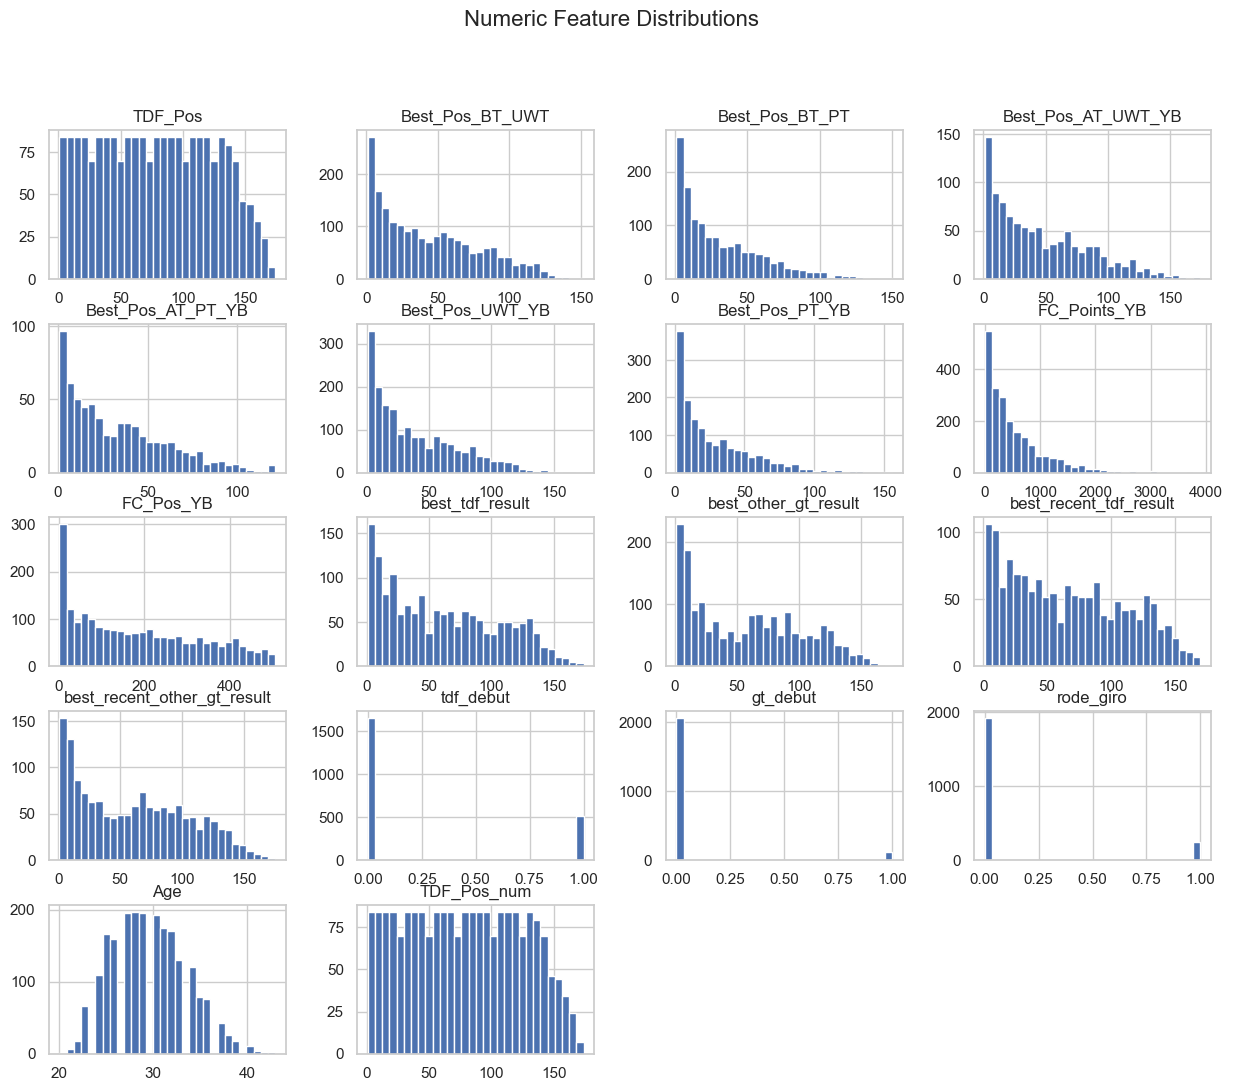

In [26]:
numeric_cols = eda_df.select_dtypes(include=['float64', 'int64']).drop(columns=['Rider_ID', 'Year'])
numeric_cols.hist(bins=30, figsize=(15,12))
plt.suptitle("Numeric Feature Distributions", fontsize=16)
plt.show()

Comments:
- TDF_Pos and TDF_Pos_num show a uniform distribution across positions, with a dip at the high end, this is because non-finishers are excluded and each year varies on the number of DNFs. 
- Binary indicators like tdf_debut, gt_debut, and rode_giro are heavily skewed toward 0, since most riders are not debutants or Giro participants. tdf_debut does have a slightly more significant number of debutants. 
- Age follows a bell-shaped curve, slightly positive skew, centering around the late 20s, tailing off just after 40. 
- Position and points based metrics all follow similar patterns, with a positive skew, most riders having stronger results. best_recent_tdf_result is slightly closer to uniform, which shows having a strong result in the Tour de France is much less likely than other race results (as it is a much harder race to finish well in).
